Flight1의 정보를 입력하고 해당 항적을 불러오는 과정
#flight1에서 #해제하면 그냥 flight1 항적 정보 볼 수 있음

In [88]:
from traffic.data import opensky
flight1 = opensky.history(
    "2023-05-01 02:33:14",
    stop="2023-05-01 02:35:14",
    icao24="e495b1",
    # returns a Flight instead of a Traffic
    return_flight=True
)

#flight1

Flight2의 정보를 입력하고 해당 항적을 불러오는 과정
#flight2에서 #해제하면 그냥 flight2 항적 정보 볼 수 있음
위의 코드와 합쳐서 아래에 합치면 그냥 하나의 코드로 만들 수 있음

In [89]:
flight2 = opensky.history(
    "2023-05-01 02:33:14",
    stop="2023-05-01 02:35:14",
    icao24="e0645a",
    # returns a Flight instead of a Traffic
    return_flight=True
)
#flight2

flight1과 flight2의 데이터가 포함하고 있는 정보들을 확인할 수 있다.

In [90]:
print("FLT1", flight1.data)
print("FLT2", flight2.data)

FLT1      alert  altitude callsign  geoaltitude  groundspeed  \
0    False   26300.0  AZU2865      27625.0        358.0   
1    False   26325.0  AZU2865      27650.0        358.0   
2    False   26325.0  AZU2865      27675.0        358.0   
3    False   26350.0  AZU2865      27675.0        358.0   
4    False   26375.0  AZU2865      27700.0        358.0   
..     ...       ...      ...          ...          ...   
115  False   27375.0  AZU2865      28800.0        361.0   
116  False   27375.0  AZU2865      28800.0        361.0   
117  False   27400.0  AZU2865      28800.0        361.0   
118  False   27400.0  AZU2865      28825.0        361.0   
119  False   27400.0  AZU2865      28825.0        361.0   

                         hour  icao24                       last_position  \
0   2023-05-01 02:00:00+00:00  e495b1 2023-05-01 02:33:13.786000128+00:00   
1   2023-05-01 02:00:00+00:00  e495b1    2023-05-01 02:33:14.872000+00:00   
2   2023-05-01 02:00:00+00:00  e495b1 2023-05-01 02:33:

위의 데이터를 csv 파일로 저장한다.

In [91]:
import pandas as pd

# DataFrame을 문자열로 변환하여 새로운 데이터프레임 생성
df_flight1 = flight1.data.copy()
df_flight2 = flight2.data.copy()

# timestamp 열을 문자열 형식으로 변환
df_flight1["timestamp"] = df_flight1["timestamp"].dt.strftime("%Y-%m-%d %H:%M:%S")
df_flight2["timestamp"] = df_flight2["timestamp"].dt.strftime("%Y-%m-%d %H:%M:%S")

# CSV 파일 경로 설정
file_path_flight1 = "e:/opensky/flights/flight1_data_3.csv"
file_path_flight2 = "e:/opensky/flights/flight2_data_3.csv"

# DataFrame을 CSV 파일로 저장
df_flight1.to_csv(file_path_flight1, index=False)
df_flight2.to_csv(file_path_flight2, index=False)

print(f"Flight1 데이터를 '{file_path_flight1}'로 저장했습니다.")
print(f"Flight2 데이터를 '{file_path_flight2}'로 저장했습니다.")


Flight1 데이터를 'e:/opensky/flights/flight1_data_3.csv'로 저장했습니다.
Flight2 데이터를 'e:/opensky/flights/flight2_data_3.csv'로 저장했습니다.


아래 코드로 구글 지도를 활용해서 저장가능하다.

In [92]:
import pandas as pd
import folium

# Load the CSV data into DataFrames
df_flight1 = pd.read_csv("e:/opensky/flights/flight1_data_3.csv")
df_flight2 = pd.read_csv("e:/opensky/flights/flight2_data_3.csv")

# Drop rows with NaN values in latitude or longitude columns
df_flight1 = df_flight1.dropna(subset=["latitude", "longitude"])
df_flight2 = df_flight2.dropna(subset=["latitude", "longitude"])

# Calculate the average coordinates for each flight
avg_lat_flight1 = df_flight1["latitude"].mean()
avg_lon_flight1 = df_flight1["longitude"].mean()

avg_lat_flight2 = df_flight2["latitude"].mean()
avg_lon_flight2 = df_flight2["longitude"].mean()

# Create a map object using Folium, centered at the average coordinates, with Stamen Terrain tiles
mymap = folium.Map(location=[avg_lat_flight1, avg_lon_flight1], zoom_start=14)

# Function to plot flight track on the map as lines with different colors
def plot_flight_track(df, mymap, color):
    points = []
    for index, row in df.iterrows():
        if index % 5 == 0:  # Display every 5th point
            lat, lon = row["latitude"], row["longitude"]
            popup_text = f"Time: {row['timestamp']}<br>Altitude: {row['altitude']} m"
            folium.CircleMarker(
                location=[lat, lon],
                radius=5,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=1,
                popup=popup_text,
            ).add_to(mymap)
            points.append((lat, lon))
    folium.PolyLine(points, color=color).add_to(mymap)

# Plot flight tracks on the map as lines with different colors
plot_flight_track(df_flight1, mymap, color="blue")
plot_flight_track(df_flight2, mymap, color="red")

# Save the map to an HTML file
mymap.save("e:/opensky/flights/flights_map_3.html")



두 항적정보를 바탕으로 그림을 그린다. 두 그래프가 같은 시간을 기준으로 위치를 표시하고, 가장 가까워지는 지점을 선으로 연결하면서 동시에 두 지점의 거리를 NM로 표시한다. 시간 옆에 고도정보와 ground speed를 추가하고, 동시간대의 정보를 나타내는 위치를 조정. 추가로 시간과 고도를 나타내는 숫자의 fontsize 조절. 인접한 공항의 위치를 알아내서 위치까지 추가함

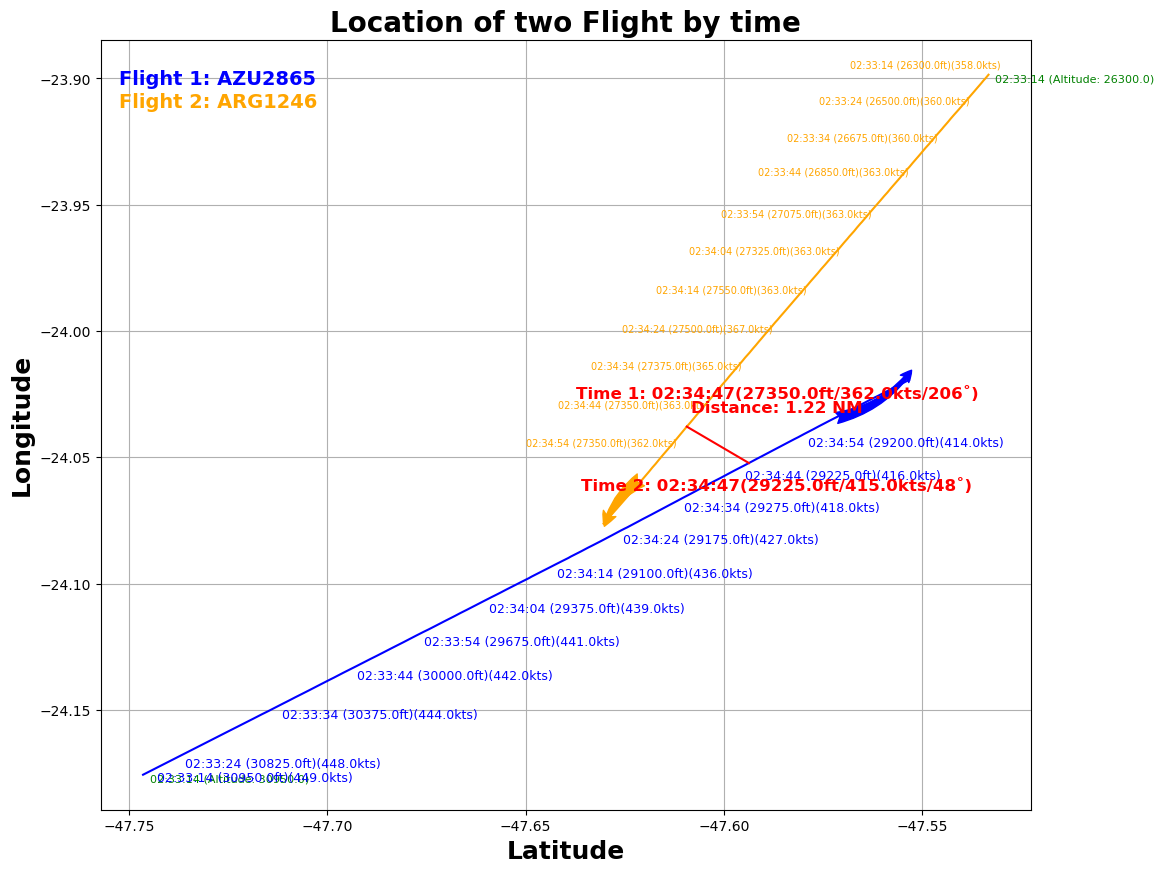

In [119]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from traffic.core import Traffic
from math import radians, sin, cos, sqrt, atan2, isnan
import numpy as np
# from traffic.data import airports

# 두 개의 Flight 객체가 있는 리스트
flights = [flight1, flight2]

# Traffic 객체로 변환
traffic = Traffic.from_flights(flights)

# 항적 시각화
fig, ax = plt.subplots(figsize=(12, 10))

# flight1을 오렌지색으로 표시
traffic[0].plot(ax=ax, color="blue")

# flight2를 초록색으로 표시
traffic[1].plot(ax=ax, color="orange")

# 항적 시작 시간과 고도 표시
for flight in traffic:
    if len(flight) > 0:
        start_time = flight.data["timestamp"].iloc[0].strftime("%H:%M:%S")
        start_altitude = flight.data["altitude"].iloc[0]
        ax.annotate(f"{start_time} (Altitude: {start_altitude})", 
                    xy=(flight.data["longitude"].iloc[0], flight.data["latitude"].iloc[0]),
                    xytext=(5,-5), fontsize=8, color="green", textcoords="offset points")

# calculate_distance 함수 정의
def calculate_distance(lat1, lon1, alt1, spd1, lat2, lon2, alt2, spd2):
    R = 3440.07  # 지구 반지름 (단위: NM)

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c  # 거리 계산 (단위: NM)
    return distance

# 같은 시간을 기준으로 비교하여 가장 가까운 지점 찾기
min_distance = float("inf")
closest_point1 = None
closest_point2 = None
closest_time1 = None
closest_time2 = None
closest_altitude1 = None
closest_altitude2 = None
closest_speed1 = None
closest_speed2 = None

for i in range(len(flights[0])):
    time1 = flights[0].data["timestamp"].iloc[i]

    # flight2에서 같은 시간을 찾기
    idx = flights[1].data["timestamp"].sub(time1).abs().idxmin()
    time2 = flights[1].data["timestamp"].iloc[idx]

    # 같은 시간에 대한 위치 정보 가져오기
    lat1 = flights[0].data.loc[flights[0].data["timestamp"] == time1, "latitude"].values[0]
    lon1 = flights[0].data.loc[flights[0].data["timestamp"] == time1, "longitude"].values[0]
    alt1 = flights[0].data.loc[flights[0].data["timestamp"] == time1, "altitude"].values[0]
    spd1 = flights[0].data.loc[flights[0].data["timestamp"] == time1, "groundspeed"].values[0]
    lat2 = flights[1].data.loc[flights[1].data["timestamp"] == time2, "latitude"].values[0]
    lon2 = flights[1].data.loc[flights[1].data["timestamp"] == time2, "longitude"].values[0]
    alt2 = flights[1].data.loc[flights[1].data["timestamp"] == time2, "altitude"].values[0]
    spd2 = flights[1].data.loc[flights[1].data["timestamp"] == time2, "groundspeed"].values[0]

    distance = calculate_distance(lat1, lon1, alt1, spd1, lat2, lon2, alt2, spd2)

    if distance < min_distance:
        min_distance = distance
        closest_point1 = (lon1, lat1)
        closest_point2 = (lon2, lat2)
        closest_time1 = time1
        closest_time2 = time2
        closest_altitude1 = alt1
        closest_altitude2 = alt2
        closest_speed1 = spd1
        closest_speed2 = spd2

    # 5초 단위로 위치 표시(초 변경가능)
    if i % 10 == 0:
        altitude1 = flights[0].data.loc[flights[0].data["timestamp"] == time1, "altitude"].values[0]
        altitude2 = flights[1].data.loc[flights[1].data["timestamp"] == time2, "altitude"].values[0]
        speed1 = flights[0].data.loc[flights[0].data["timestamp"] == time1, "groundspeed"].values[0]
        speed2 = flights[1].data.loc[flights[1].data["timestamp"] == time2, "groundspeed"].values[0]
        track1 = flights[0].data.loc[flights[0].data["timestamp"] == time1, "track"].values[0]
        track2 = flights[1].data.loc[flights[1].data["timestamp"] == time2, "track"].values[0]
        # NaN이 아닌 경우에만 정수로 변환
        track1 = int(track1) if not isnan(track1) else track1
        track2 = int(track2) if not isnan(track2) else track2
        
        ax.annotate(f"{time1.strftime('%H:%M:%S')} ({altitude1}ft)({speed1}kts)", xy=(lon1, lat1),
                    xytext=(-100, 5),fontsize=7,color="orange", textcoords="offset points")
        ax.annotate(f"{time2.strftime('%H:%M:%S')} ({altitude2}ft)({speed2}kts)", xy=(lon2, lat2),
                    xytext=(10, -5), fontsize=9, color="blue", textcoords="offset points")

# 화살표 설정
arrow_properties1 = dict(arrowstyle='fancy', color='orange', mutation_scale=25)
arrow_properties2 = dict(arrowstyle='fancy', color='blue', mutation_scale=20)


# 화살표 추가 함수 정의
def add_arrow(ax, start_point, end_point, arrow_properties):
    arrow = FancyArrowPatch(start_point, end_point,
                            connectionstyle="arc3, rad=0.2",
                            **arrow_properties)
    ax.add_patch(arrow)
    
# 가장 가까운 지점 표시
ax.plot([closest_point1[0], closest_point2[0]], [closest_point1[1], closest_point2[1]], color="red")
ax.annotate(f"Distance: {min_distance:.2f} NM", xy=(closest_point1[0], closest_point1[1]), fontsize=12,
            xytext=(65, 10), textcoords="offset points", color="red", ha="center", fontweight='bold')
ax.annotate(f"Time 1: {closest_time1.strftime('%H:%M:%S')}({closest_altitude1}ft/{closest_speed1}kts/{track1}˚)", xy=(closest_point1[0], closest_point1[1]),fontsize=12,
            xytext=(65, 20), textcoords="offset points", color="red", ha="center", fontweight='bold')
ax.annotate(f"Time 2: {closest_time2.strftime('%H:%M:%S')}({closest_altitude2}ft/{closest_speed2}kts/{track2}˚)", xy=(closest_point2[0], closest_point2[1]),fontsize=12,
            xytext=(20, -20), textcoords="offset points", color="red", ha="center", fontweight='bold')

# 화살표로 비행기 움직임 표현(화살표의 끝지점 지정을 통해 화살표 방향 설정)
add_arrow(ax, (lon1, lat1), (lon1-0.01, lat1-0.02), arrow_properties1)  # 비행기 1 화살표
add_arrow(ax, (lon2, lat2), (lon2+0.02, lat2+0.02), arrow_properties2)  # 비행기 2 화살표

# 항적 번호(ICAO24) 라벨 모아서 표시
icao_labels1 = []
icao_labels1.append("Flight 1: " + flights[0].data["callsign"].iloc[-1])
icao_labels2 = []
icao_labels2.append("Flight 2: " + flights[1].data["callsign"].iloc[-1])

ax.annotate('\n'.join(icao_labels1), xy=(0.02, 0.98), xycoords='axes fraction',
            xytext=(0, -10), textcoords='offset points',
            ha='left', va='top', fontweight='bold', color='blue', fontsize=14)
ax.annotate('\n'.join(icao_labels2), xy=(0.02, 0.95), xycoords='axes fraction',
            xytext=(0, -10), textcoords='offset points',
            ha='left', va='top', fontweight='bold', color='orange', fontsize=14)
# 그림제목 및 X,Y축 라벨링
ax.grid(True)
plt.title("Location of two Flight by time", fontweight="bold", fontsize=20)
plt.xlabel("Latitude", fontweight="bold", fontsize=18)
plt.ylabel("Longitude", fontweight="bold", fontsize=18)
# x축 눈금 레이블 수정
plt.show()


공항 그림과 함께 깔끔한 선으로 표현된 그림이다

In [94]:
import altair as alt
subset = flights
alt.layer(
    *(
        flight.chart().encode(
            alt.Y("altitude"),
            alt.Color("callsign"),
        )
        for flight in subset
    )
)

alt.LayerChart(...)

In [95]:
subset = flights

In [96]:
chart = (
    alt.layer(
        *(flight.geoencode().encode(alt.Color("callsign:N")) for flight in subset)
    )
    .properties(title="Location of two Flight by time")
    .configure_legend(orient="bottom")
    .configure_view(stroke=None)
    .configure_title(anchor="start", font="Lato", fontSize=16)
)
chart

alt.LayerChart(...)

subset에 0또는 1을 넣어서 각 각의 항적을 지도에 시현할 수 있다.

In [97]:
subset[0].map_leaflet(zoom=12)

Map(center=[-23.986818106699804, -47.58153437168592], controls=(ZoomControl(options=['position', 'zoom_in_text…

지도 위에 항적을 표시해주는 코드이다. 항적자료에 이상이 없다면 두개의 선이 표시된다.

In [98]:
from ipyleaflet import Map, basemap_to_tiles, Polyline, basemaps

# Traffic 객체로 변환
traffic = Traffic.from_flights([flight1, flight2])

# 지도 객체 생성
m = Map(center=(flight1.data["latitude"].mean(), flight1.data["longitude"].mean()), zoom=11)

# 지도에 타일 레이어 추가 (예: OpenStreetMap.Mapnik)
basemap_layer = basemap_to_tiles(basemaps.OpenStreetMap.Mapnik)
m.add_layer(basemap_layer)

# 항적 시각화
for i, flight in enumerate(traffic):
    color = "red" if i == 0 else "blue"
    polyline = Polyline(
        locations=flight.data[["latitude", "longitude"]].values.tolist(),
        color=color
    )
    m.add_layer(polyline)

# 지도 출력
m



Map(center=[-23.986818106699804, -47.58153437168592], controls=(ZoomControl(options=['position', 'zoom_in_text…